<a href="https://colab.research.google.com/github/BradleyAgwa/WEEK-2-CORE/blob/main/Moringa_Data_Science_Core_W2_Independent_Project_2021_12_Bradley_Agwa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WEEK TWO INDEPENDENT PROJECT**

## 1. Defining the Question

### a) Specifying the Data Analytic Question

To figure out how we can predict which individuals are most likely to have or use a bank account putting into consideration of other factors

### b) Defining the Metric for Success

Taking the other factors provided into consideration, we should be able to get which of those are highly likely to affect people having bank accounts.

### c) Understanding the context 

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

### d) Recording the Experimental Design

### e) Data Relevance

The data provided is relevant to this study.It is suitable to carry out analysis and give the output needed

In [ ]:
variable = 'http://bit.ly/VariableDefinitions'
variables = pd.read_csv(variable)
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


## Reading the data


In [2]:
# Importing the libraries to be used

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib

from matplotlib import pyplot as plt

In [3]:
# Loading the Data from the source we are given:
# Dataset: http://bit.ly/FinancialDataset
# 
df = pd.read_csv('http://bit.ly/FinancialDataset')
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
# Checking the bottom of our data
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


## Data Understanding

In [5]:
# Running a no.of records check on our dataset.
#
df.shape

(23524, 13)

Our dataset has 23,524 rows and 13 columns.

In [6]:
# Checking the data types for each column in our dataset
#
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [7]:
# Checking the full information of our dataset.
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [8]:
# Checking for duplicates
#
df.duplicated(keep=False).sum()

0

There are no duplicates in our dataset.

## Data Cleaning

### Validity

In [9]:
# Checking the columns
# To see if they match what is in the variables table
#
df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [10]:
# Renaming the columns
df1=df.rename(columns={'country':'Country','year':'Year','uniqueid':'Unique ID','Has a Bank account':'Bank A/C','Type of Location':'Location','household_size':'Household Size',
                             'Respondent Age':'Age','gender_of_respondent':'Gender','The relathip with head':'Relationship With Head',
                             'marital_status':'Marital Status','Level of Educuation':'Education Level'})
df1.head() 

,Country,Year,Unique ID,Bank A/C,Location,Cell Phone Access,Household Size,Age,Gender,Relationship With Head,Marital Status,Education Level,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


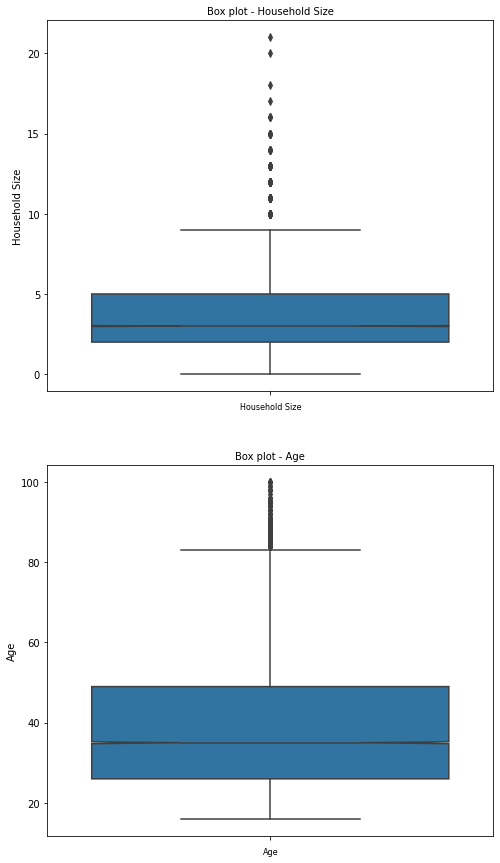

In [11]:
# Checking for Outliers
#
col_names = ['Household Size', 'Age']

fig, ax = plt.subplots(len(col_names), figsize=(8,15))

for i, col_val in enumerate(col_names):
  sns.boxplot(y=df1[col_val], notch=True, ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

Didn't drop the outliers as they were a representation of real time data which if removed will affect the data analysis.

In [12]:
# Check for anomalies
#
lower = df1.quantile(.25)
upper= df1.quantile(.75)

iqr =upper - lower
print(iqr)

Year               2.0
Household Size     3.0
Age               23.0
dtype: float64


### Completeness

In [13]:
# Running a check for any null values
#
df1.isnull().sum()

Country                   14
Year                       0
Unique ID                  0
Bank A/C                  36
Location                  15
Cell Phone Access         11
Household Size            28
Age                       34
Gender                    34
Relationship With Head     4
Marital Status            32
Education Level           29
Type of Job               30
dtype: int64

There are null values in every column, except the Year and Unique ID columns.

In [14]:
# Dropping all null values
# This is because if dropped they won't affect our analysis.
#
df2 =df1.dropna()
df2.head()

,Country,Year,Unique ID,Bank A/C,Location,Cell Phone Access,Household Size,Age,Gender,Relationship With Head,Marital Status,Education Level,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [15]:
# Checking if there are still any missing values
# 
df2.isnull().sum()

Country                   0
Year                      0
Unique ID                 0
Bank A/C                  0
Location                  0
Cell Phone Access         0
Household Size            0
Age                       0
Gender                    0
Relationship With Head    0
Marital Status            0
Education Level           0
Type of Job               0
dtype: int64

The null values have been dropped as seen above.


### Consistency

In [16]:
df2.duplicated().sum()

0

The dataset has no duplicates

### Uniformity

In [17]:
# Changing the Year to the datetime datatype
df1['Year'] = pd.to_datetime(df1['Year'])
df1['Year'].head()

0   1970-01-01 00:00:00.000002018
1   1970-01-01 00:00:00.000002018
2   1970-01-01 00:00:00.000002018
3   1970-01-01 00:00:00.000002018
4   1970-01-01 00:00:00.000002018
Name: Year, dtype: datetime64[ns]

# Exploratory Data Analysis

**Leading questions:**


*   Which gender was the highest in opening bank accounts?
*   Which country had the highest bank account holders?


## Univariate analysis


### Central Tendencies

In [18]:
# Runninng a univariate summary for the data set
#
df2.describe()

,Year,Household Size,Age
count,23343.000000,23343.000000,23343.000000
mean,2016.980594,3.688643,38.805509
std,0.901740,2.281184,16.519803
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


From the above check we can get an overview of important statistical stuff like; mean, quartiles, standard deviation etc.

*   Maximum age of the respodents was 100 years.

*   The youngest age being 16 years

*   There were a total of 23343 respondents

*   The maximum household size being 21
*   The average household size being 3







In [19]:
# Mode
#
Age_mode=df2['Age'].mode()
Age_mode

0    30.0
dtype: float64

The mode age for the respondents was 30years

In [20]:
# Mean
#
Age_mean=df2['Age'].mean()
Age_mean

38.80550914621085

Average age of the respondents is 38 years.

In [21]:
# Median
#
Age_median=df2['Age'].median()
Age_median

35.0

The median age of the respondents is 35 years

### Measures of Dispersion/Variability

#### Standard Deviation

In [22]:
# Standard Deviation for the age
#
df2['Age'].std()

16.51980349804178

Due to data points being close to the mean we've gotten a relatively low deviation in age.

In [23]:
# Standard Deviation for the Household Size
#
df2['Household Size'].std()

2.2811835250351495

Same as the age we have a low deviation because of the data points being close to the mean

#### Variance

In [24]:
# Variance of the age.
#
df2['Age'].var()

272.90390761391353

In [25]:
# Variance of the Household Size
#
df2['Household Size'].var()

5.20379827489179

#### Range 

In [26]:
# Range in Age
#
df2_max = df2['Age'].max()
df2_min = df2['Age'].min()
df2_max-df2_min

84.0

In [27]:
# Range in Household Size
#
df2_max1=df2['Household Size'].max()
df2_min1=df2['Household Size'].min()
df2_max1-df2_min1

21.0

#### Quartiles

In [28]:
# Finding the Age quartiles
#
df2['Age'].quantile([0.25,0.5,0.75])

0.25    26.0
0.50    35.0
0.75    49.0
Name: Age, dtype: float64



1.   Q1 Age = 26 years
2.   Q2 Age = 35 years

1.   Q3 Age = 49 years






In [29]:
# Finding the Household size quartiles
#
df2['Household Size'].quantile([0.25,0.5,0.75])

0.25    2.0
0.50    3.0
0.75    5.0
Name: Household Size, dtype: float64



1.   Q1 Household Size = 2
2.   Q2 Household Size = 3

1.   Q3 Household Size = 5






#### Skewness

In [30]:
# Getting the skewness
#
df2['Age'].skew()

0.840661747532081

The distribution is positively skewed as we have gotten a positive value.

In [31]:
# Determining the skeweness using kurt
#
age_kurt=df2["Age"].kurt()
age_kurt

0.09844652254807196

The tail of distribution is heavy due to the presence of outliers. The Kurtosis>0.

### Frequency Tables

In [32]:
# Frequency per country
#
df2.Country.value_counts()

Rwanda      8684
Tanzania    6500
Kenya       6064
Uganda      2095
Name: Country, dtype: int64

Rwanda has a majority of the respondents

In [33]:
# Frequency per gender
#
df2.Gender.value_counts()

Female    13767
Male       9576
Name: Gender, dtype: int64

The gender with the most respondents was female.

In [34]:
# Frequency per Location
#
df2.Location.value_counts()

Rural    14264
Urban     9079
Name: Location, dtype: int64

The Rural area had the most respondents

### Visualization

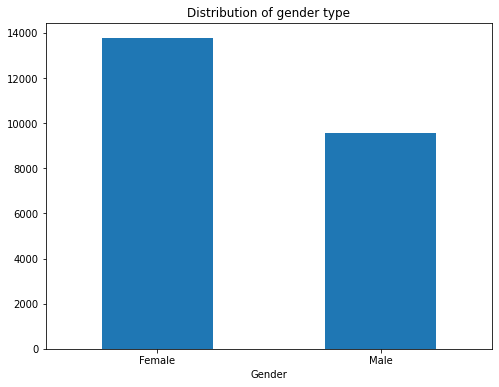

In [35]:
# A bar graph of the Gender
plt.figure(figsize = (8, 6))
df2.Gender.value_counts().plot(kind = 'bar', rot = 0)
plt.xlabel('Gender')
plt.title('Distribution of gender type')
plt.show()

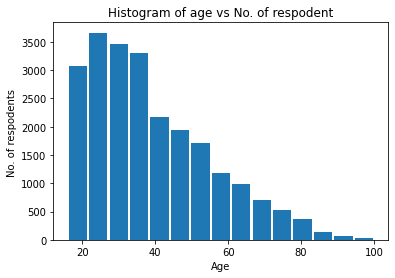

In [36]:
# A histogram showing the Age
respodent_age = df2['Age']

plt.hist(respodent_age, bins=15, histtype='bar', rwidth=0.9)
plt.xlabel('Age')
plt.ylabel('No. of respodents ')
plt.title('Histogram of age vs No. of respodent')
plt.show()

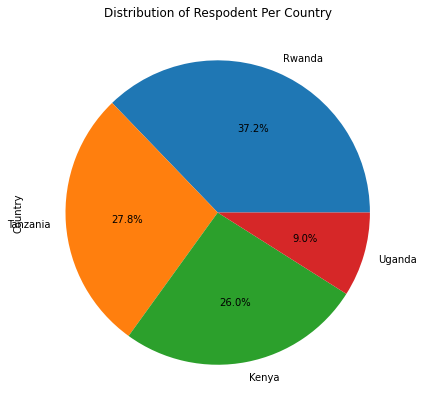

In [37]:
# A pie chart showing distribution per country
#
plt.figure(figsize = (9, 7))
df2.Country.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Distribution of Respodent Per Country')
plt.show()

## Bivariate analysis

#### Line graph

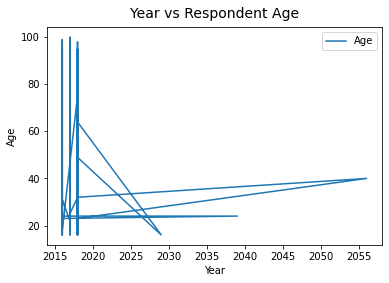

In [39]:
# Plotting the  graph
df2.plot( x = 'Year' , y = 'Age')

# Giving it a title
plt.title("Year vs Respondent Age", fontsize=14, y=1.015)

# Labelling the y-axis
plt.ylabel('Age')

# Labelling the x-axis
plt.xlabel('Year')

# Displaying our graph
plt.show()

#### Scatter plot

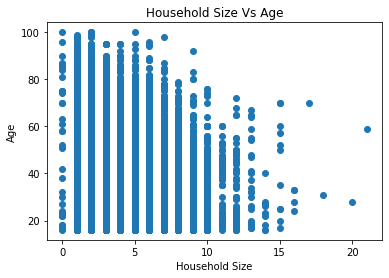

In [41]:
# Plotting the scatterplot
plt.scatter(df2['Household Size'], df2['Age'])

# Giving it a title
plt.title('Household Size Vs Age')

# Labelling our x axis
plt.xlabel('Household Size')

# Labelling our y axis
plt.ylabel('Age')

# Displaying our scatterplot
plt.show()

#### Heat map

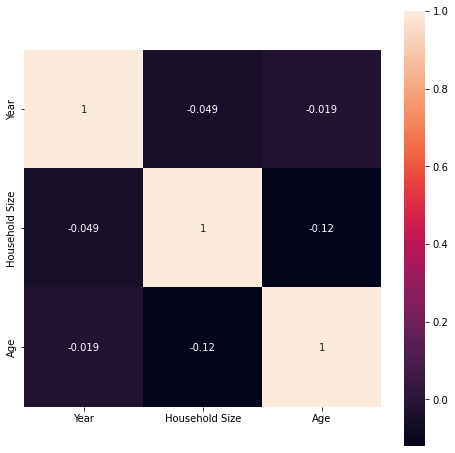

In [47]:
# Using heatmap we plot the correlation between various variables
#
plt.figure(figsize=(8,8))
sns.heatmap(df2.corr(), annot=True, square=True) 

Age and Household Size are  contrarily related.

#### Stacked column chart

Text(0.5, 1.0, 'Relation between the level of education and job type')

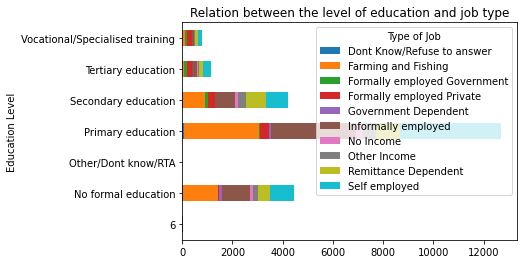

In [52]:
# A stacked bar graph to show;
# the relation between the level of education and job type
#
df2.groupby(['Education Level', 'Type of Job']).size().unstack().plot(kind='barh', stacked=True)
plt.title('Relation between the level of education and job type')

#### Crosstabs

In [53]:
# Gender crosstabs

gender=df2['Gender']
account=df2['Bank A/C']
gendercrosstabs= pd.crosstab(gender,account)
gendercrosstabs

Bank A/C,No,Yes
Gender,,
Female,12287,1480
Male,7759,1817


## Multivariate analysis

In [59]:
from sklearn.preprocessing import LabelEncoder
# Encoding the object columns
columns = ['Country','Bank A/C', 'Location','Cell Phone Access','Gender','Relationship With Head','Marital Status','Education Level','Type of Job']

# Converting the categorical variables 
df3= df2[columns].apply(LabelEncoder().fit_transform)
#
df3.head()

,Country,Bank A/C,Location,Cell Phone Access,Gender,Relationship With Head,Marital Status,Education Level,Type of Job
0,0,1,0,1,0,5,2,4,9
1,0,0,0,0,0,1,4,1,4
2,0,1,1,1,1,3,3,6,9
3,0,0,0,1,0,1,2,3,3
4,0,0,1,0,1,0,3,3,5


#### Principal Component Analysis(PCA)

In [60]:
# Step 1: Preprocessing
# The first preprocessing step is to divide the dataset into a feature set and corresponding labels. 
# The following script performs this task. The script below stores the feature sets into the X variable 
# and the series of corresponding labels in to the y variable.
# 
X = df3.drop('Bank A/C', 1)
y = df3['Bank A/C']

In [61]:
# Step 2: Splitting the dataset into the Training set and Test set
# The next preprocessing step is to divide data into training and test sets. 
# 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [62]:
# Step 3: Normalization
# As mentioned earlier, PCA performs best with a normalized feature set. 
# We will perform standard scalar normalization to normalize our feature set. 
# 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [63]:
# Step 4: Applying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [64]:
# Step 5: Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
explained_variance = pca.explained_variance_ratio_

# The explained_variance variable is now a float type array which contains variance ratios for each principal component. 
explained_variance

array([0.22082434, 0.18415644, 0.1616252 , 0.12445001, 0.10049337,
       0.08361902, 0.06936873, 0.05546289])

In [65]:
# Step 6: Applying PCA
# It is only a matter of three lines of code to perform PCA using Python's Scikit-Learn library. 
# The PCA class is used for this purpose. PCA depends only upon the feature set and not the label data. 
# Therefore, PCA can be considered as an unsupervised machine learning technique.
# Performing PCA using Scikit-Learn is a two-step process:
# Initialize the PCA class by passing the number of components to the constructor.
# Call the fit and then transform methods by passing the feature set to these methods. 
# The transform method returns the specified number of principal components.
# Let's take a look at the following code. In the code above, we create a PCA object named pca. 
# We did not specify the number of components in the constructor. 
# Hence, all four of the features in the feature set will be returned for both the training and test sets.
# 
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [66]:
# Step 7: Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
# We execute the following line of code to find the "explained variance ratio".
# 
explained_variance = pca.explained_variance_ratio_

# The explained_variance variable is now a float type array which contains variance ratios for each principal component. 
# The values for the explained_variance variable looks like what is shown in the output. 
explained_variance

array([0.22082434, 0.18415644, 0.1616252 , 0.12445001, 0.10049337,
       0.08361902, 0.06936873, 0.05546289])

In [67]:
# Step 8: Using 1 Principal Component
# Let's first try to use 1 principal component to train our algorithm. To do so, execute the following code:
# 
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [68]:
# Step 9: Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [69]:
# Step 10: Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[4008    0]
 [ 661    0]]
Accuracy 0.8584279288926965


With a single principal componenet we get an accuracy of 85.8%

#### PCA with two componenets

In [77]:
# Step 1: Preprocessing
# The first preprocessing step is to divide the dataset into a feature set and corresponding labels. 
# The following script performs this task.
X = df3.drop('Country', 1)
y = df3['Bank A/C']

In [78]:
# Step 2: Splitting the dataset into the Training set and Test set
# The next preprocessing step is to divide data into training and test sets. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [79]:
# Step 3: Normalization
# As mentioned earlier, PCA performs best with a normalized feature set. 
# We will perform standard scalar normalization to normalize our feature set. 
from sklearn.preprocessing import StandardScaler

In [80]:
# Step 4: Splitting the dataset into the Training set and Test set
# The next preprocessing step is to divide data into training and test sets. 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [81]:
# Step 5: Normalization
# As mentioned earlier, PCA performs best with a normalized feature set. 
# We will perform standard scalar normalization to normalize our feature set. 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [82]:
# Step 6: Applying PCA

# 
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [83]:
# Step 7: Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
# We execute the following line of code to find the "explained variance ratio".
# 
explained_variance = pca.explained_variance_ratio_

# The explained_variance variable is now a float type array which contains variance ratios for each principal component. 
# The values for the explained_variance variable looks like what is shown in the output. 
explained_variance

array([0.21711704, 0.18042259, 0.16970423, 0.12343373, 0.09634498,
       0.08037306, 0.0748586 , 0.05774577])

In [84]:
# Step 8: Results with 2 Principal Components
# Now let's try to evaluate classification performance of the random forest algorithm 
# with 2 principal components. 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [85]:
# Step 9: Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [86]:
# Step 10: Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[3958   50]
 [ 191  470]]
Accuracy 0.9483829513814521


Using two components our accuracy shoots to 94.8%

#### Further summarry

In [91]:
# Relationship between having bank account and country

df2.groupby(["Country","Bank A/C"])["Unique ID"].count()

Country   Bank A/C
Kenya     No          4544
          Yes         1520
Rwanda    No          7687
          Yes          997
Tanzania  No          5901
          Yes          599
Uganda    No          1914
          Yes          181
Name: Unique ID, dtype: int64

Kenya has the most individuals with bank accounts while Rwanda has the most individuals without one.

In [92]:
# Relationship between having bank account and country

df2.groupby(["Age","Bank A/C"])["Unique ID"].count().sort_values(ascending=False).head(60) 

Age   Bank A/C
30.0  No          867
35.0  No          695
25.0  No          668
28.0  No          617
20.0  No          586
32.0  No          581
18.0  No          562
40.0  No          558
23.0  No          504
22.0  No          503
26.0  No          498
27.0  No          486
24.0  No          479
45.0  No          478
17.0  No          464
16.0  No          455
33.0  No          440
38.0  No          439
19.0  No          438
34.0  No          431
21.0  No          425
29.0  No          422
31.0  No          382
50.0  No          368
36.0  No          365
37.0  No          353
42.0  No          338
60.0  No          337
39.0  No          316
43.0  No          310
41.0  No          270
48.0  No          269
65.0  No          261
55.0  No          254
47.0  No          252
70.0  No          242
52.0  No          238
49.0  No          221
46.0  No          218
53.0  No          211
44.0  No          209
56.0  No          209
54.0  No          194
58.0  No          180
51.0  No         

Age 30 is the most popular in terms of  having a bank account.

In [93]:
# Relationship between type of job and having account
#
df2.groupby(["Type of Job","Bank A/C"])["Unique ID"].count().sort_values(ascending=False).head(20)

Type of Job                   Bank A/C
Self employed                 No          5517
Informally employed           No          5110
Farming and Fishing           No          4788
Remittance Dependent          No          2269
Other Income                  No           881
Self employed                 Yes          844
Farming and Fishing           Yes          634
No Income                     No           605
Formally employed Private     Yes          567
                              No           481
Informally employed           Yes          440
Formally employed Government  Yes          299
Remittance Dependent          Yes          240
Government Dependent          No           197
Other Income                  Yes          196
Dont Know/Refuse to answer    No           111
Formally employed Government  No            87
Government Dependent          Yes           50
Dont Know/Refuse to answer    Yes           14
No Income                     Yes           13
Name: Unique ID, dtyp

People in self and informal employment have a high number without bank accounts, but still the self employed people are still the ones with the most accounts.

### Implementing the solution



*   The job type has an effect on who holds a bank account.
*   Age isn't really much of a factor


*   Gender is an interesting factor as females have more accounts compared to their male counterparts





### Challenging the solution

The key question here should have been finding out those without a bank account

Conclusion

The percentage of individuals with bank accounts is quite low and the public should be educated on the benefits and workings of having a bank account in order to encourage more individuals to have one.

Individuals in their 30s seems to be of the idea of having an account, this might be atrributed to the fact that, most people have more financial understanding at this time and are more open to bank services like saving and such.



## Follow Up Questions

### 1. Did we have the right data?

Yes

## 2. Do we need other data to answer our question?

No

#### 3. Did we have the right question?

The more appropriate question would have been what factors hinder individuals from having a bank account.